In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TensesData.csv to TensesData.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import tensorflow as tf
import tensorflow_hub as hub
import nltk
from nltk.corpus import words
from nltk.corpus import wordnet 
from itertools import chain
from nltk.corpus import stopwords
import random  
import string
import bs4 as bs  
import urllib.request  
import re  
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['TensesData.csv']))

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def string_cleaning(text):
    #everything to lower
    text = text.lower()
    
    #removing non ascii charcters
    text = text.encode('ascii', 'ignore').decode()
    
    #removing the links
    link_regex = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    text = re.sub(link_regex, '', text)
    
    #removing user name handles and combination of numbers strings and special characters
    usernamehandles_regex = "@\S+"
    text = re.sub(usernamehandles_regex, '', text)
    
    #removing hashtags
    text = re.sub("#\S+", " ", text)
    
    #removing ' and next character
    text = re.sub("\'\w+", '', text)
    
    #removing puncuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    #removing numbers
    text = re.sub(r'\w*\d+\w*', '', text)
    
    #removing over spaces
    text = re.sub('\s{2,}', " ", text)
    
    #removing non dictionary words
    # text = " ".join(w for w in nltk.wordpunct_tokenize(text) if ((w in manywords) and (w.isalpha())))
    return text

In [ ]:
df.head()

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle
0,I walk to the store.,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,She sings a beautiful song.,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,He reads a book.,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,We play a game.,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,You work hard.,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
df['Text'] =  df['Text'].apply(lambda x : string_cleaning(x))
df['Text'] =  df['Text'].apply(lambda x : remove_stop(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle
0,walk store,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,play game,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,work hard,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
docs = df['Text'].apply(nlp)
data_tok=[]
for doc in docs:
    for token in doc:
      data_tok.append([token.text,token.pos_])
print(data_tok)

[['walk', 'VERB'], ['store', 'NOUN'], ['sings', 'VERB'], ['beautiful', 'ADJ'], ['song', 'NOUN'], ['reads', 'VERB'], ['book', 'NOUN'], ['play', 'VERB'], ['game', 'NOUN'], ['work', 'VERB'], ['hard', 'ADV'], ['watch', 'VERB'], ['movie', 'NOUN'], ['eat', 'VERB'], ['apple', 'NOUN'], ['drinks', 'VERB'], ['glass', 'NOUN'], ['water', 'NOUN'], ['writes', 'VERB'], ['letter', 'NOUN'], ['picnic', 'NOUN'], ['take', 'VERB'], ['nap', 'NOUN'], ['go', 'VERB'], ['drive', 'VERB'], ['climb', 'NOUN'], ['tree', 'NOUN'], ['types', 'NOUN'], ['email', 'VERB'], ['listens', 'VERB'], ['music', 'NOUN'], ['go', 'VERB'], ['beach', 'NOUN'], ['make', 'VERB'], ['cake', 'NOUN'], ['draw', 'VERB'], ['picture', 'NOUN'], ['buy', 'VERB'], ['shirt', 'NOUN'], ['orders', 'NOUN'], ['lunch', 'NOUN'], ['mows', 'NOUN'], ['lawn', 'VERB'], ['plant', 'NOUN'], ['garden', 'NOUN'], ['feed', 'NOUN'], ['birds', 'NOUN'], ['go', 'VERB'], ['park', 'NOUN'], ['clean', 'ADJ'], ['room', 'NOUN'], ['washes', 'VERB'], ['dishes', 'NOUN'], ['cooks', '

In [ ]:
data_tok

[['walk', 'VERB'],
 ['store', 'NOUN'],
 ['sings', 'VERB'],
 ['beautiful', 'ADJ'],
 ['song', 'NOUN'],
 ['reads', 'VERB'],
 ['book', 'NOUN'],
 ['play', 'VERB'],
 ['game', 'NOUN'],
 ['work', 'VERB'],
 ['hard', 'ADV'],
 ['watch', 'VERB'],
 ['movie', 'NOUN'],
 ['eat', 'VERB'],
 ['apple', 'NOUN'],
 ['drinks', 'VERB'],
 ['glass', 'NOUN'],
 ['water', 'NOUN'],
 ['writes', 'VERB'],
 ['letter', 'NOUN'],
 ['picnic', 'NOUN'],
 ['take', 'VERB'],
 ['nap', 'NOUN'],
 ['go', 'VERB'],
 ['drive', 'VERB'],
 ['climb', 'NOUN'],
 ['tree', 'NOUN'],
 ['types', 'NOUN'],
 ['email', 'VERB'],
 ['listens', 'VERB'],
 ['music', 'NOUN'],
 ['go', 'VERB'],
 ['beach', 'NOUN'],
 ['make', 'VERB'],
 ['cake', 'NOUN'],
 ['draw', 'VERB'],
 ['picture', 'NOUN'],
 ['buy', 'VERB'],
 ['shirt', 'NOUN'],
 ['orders', 'NOUN'],
 ['lunch', 'NOUN'],
 ['mows', 'NOUN'],
 ['lawn', 'VERB'],
 ['plant', 'NOUN'],
 ['garden', 'NOUN'],
 ['feed', 'NOUN'],
 ['birds', 'NOUN'],
 ['go', 'VERB'],
 ['park', 'NOUN'],
 ['clean', 'ADJ'],
 ['room', 'NOUN'],
 

In [ ]:
df1 = pd.DataFrame(data_tok, columns=['Tokens', 'POS'])
df1

,Tokens,POS
0,walk,VERB
1,store,NOUN
2,sings,VERB
3,beautiful,ADJ
4,song,NOUN
...,...,...
10185,snowman,NOUN
10186,checking,VERB
10187,emails,NOUN
10188,getting,VERB


In [ ]:
df1['POS'].value_counts()

NOUN     5015
VERB     2953
ADJ       934
NUM       588
PROPN     350
ADV       203
ADP        83
AUX        29
DET        28
PRON        6
PUNCT       1
Name: POS, dtype: int64

In [ ]:
df1 = df1.set_index("POS")
df1

,Tokens
POS,
VERB,walk
NOUN,store
VERB,sings
ADJ,beautiful
NOUN,song
...,...
NOUN,snowman
VERB,checking
NOUN,emails


In [ ]:
df1 = df1.drop(["NOUN", "PROPN", "PRON", "PUNCT", "AUX", "DET"])
df1

,Tokens
POS,
VERB,walk
VERB,sings
ADJ,beautiful
VERB,reads
VERB,play
...,...
VERB,eating
VERB,making
VERB,checking


In [ ]:
df1 = df1.reset_index()
df1

,POS,Tokens
0,VERB,walk
1,VERB,sings
2,ADJ,beautiful
3,VERB,reads
4,VERB,play
...,...,...
4756,VERB,eating
4757,VERB,making
4758,VERB,checking
4759,VERB,getting


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['POS'] = label_encoder.fit_transform(df1['POS'])
  
df1['POS'].unique()

array([4, 0, 2, 3, 1])

In [ ]:
df1 = df1.set_index([df1.index, 'POS'])['Tokens'].unstack()
df1

POS,0,1,2,3,4
0,NaN,NaN,NaN,NaN,walk
1,NaN,NaN,NaN,NaN,sings
2,beautiful,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,reads
4,NaN,NaN,NaN,NaN,play
...,...,...,...,...,...
4756,NaN,NaN,NaN,NaN,eating
4757,NaN,NaN,NaN,NaN,making
4758,NaN,NaN,NaN,NaN,checking
4759,NaN,NaN,NaN,NaN,getting


In [ ]:
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle
0,walk store,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,play game,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,work hard,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
extracted_col = df1[4]
df = df.join(extracted_col, lsuffix='_left')
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle,4
0,walk store,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sings
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,play game,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reads
4,work hard,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,going
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buying


In [ ]:
extracted_col1 = df1[3]
df = df.join(extracted_col1, lsuffix='_left')
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle,4,3
0,walk store,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk,NaN
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sings,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,play game,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reads,NaN
4,work hard,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,play,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,going,NaN
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,six
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buying,NaN


In [ ]:
extracted_col2 = df1[2]
df = df.join(extracted_col2, lsuffix='_left')
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle,4,3,2
0,walk store,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk,NaN,NaN
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sings,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,play game,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reads,NaN,NaN
4,work hard,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,play,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,going,NaN,NaN
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,six,NaN
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buying,NaN,NaN


In [ ]:
extracted_col3 = df1[1]
df = df.join(extracted_col3, lsuffix='_left')
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle,4,3,2,1
0,walk store,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk,NaN,NaN,NaN
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sings,NaN,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,play game,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reads,NaN,NaN,NaN
4,work hard,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,play,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,going,NaN,NaN,NaN
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,six,NaN,NaN
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buying,NaN,NaN,NaN


In [ ]:
extracted_col3 = df1[0]
df = df.join(extracted_col3, lsuffix='_left')
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,Adjective,Preposition,Modal,Conjunction,Determiner,Verb present,Verb past,Verb past participle,4,3,2,1,0
0,walk store,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk,NaN,NaN,NaN,NaN
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sings,NaN,NaN,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beautiful
3,play game,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reads,NaN,NaN,NaN,NaN
4,work hard,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,next
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,going,NaN,NaN,NaN,NaN
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,six,NaN,NaN,NaN
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buying,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(['Adjective', 'Preposition', 'Modal', 'Conjunction', 'Determiner', 'Verb present', 'Verb past', 'Verb past participle'], axis=1)

In [ ]:
df

,Text,Category,Noun,Personal Pronoun,Adverb,Verb,4,3,2,1,0
0,walk store,Present Tense,NaN,NaN,NaN,NaN,walk,NaN,NaN,NaN,NaN
1,sings beautiful song,Present Tense,NaN,NaN,NaN,NaN,sings,NaN,NaN,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beautiful
3,play game,Present Tense,NaN,NaN,NaN,NaN,reads,NaN,NaN,NaN,NaN
4,work hard,Present Tense,NaN,NaN,NaN,NaN,play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,next
2846,eating dinner,Present Tense,NaN,NaN,NaN,NaN,going,NaN,NaN,NaN,NaN
2847,making snowman,Present Tense,NaN,NaN,NaN,NaN,NaN,six,NaN,NaN,NaN
2848,checking emails,Present Tense,NaN,NaN,NaN,NaN,buying,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(['Noun', 'Personal Pronoun', 'Adverb', 'Verb'], axis=1)

In [ ]:
df

,Text,Category,4,3,2,1,0
0,walk store,Present Tense,walk,NaN,NaN,NaN,NaN
1,sings beautiful song,Present Tense,sings,NaN,NaN,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,beautiful
3,play game,Present Tense,reads,NaN,NaN,NaN,NaN
4,work hard,Present Tense,play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,next
2846,eating dinner,Present Tense,going,NaN,NaN,NaN,NaN
2847,making snowman,Present Tense,NaN,six,NaN,NaN,NaN
2848,checking emails,Present Tense,buying,NaN,NaN,NaN,NaN


In [ ]:
df = df.rename(columns={'0': 'Verb'})
df

,Text,Category,4,3,2,1,0
0,walk store,Present Tense,walk,NaN,NaN,NaN,NaN
1,sings beautiful song,Present Tense,sings,NaN,NaN,NaN,NaN
2,reads book,Present Tense,NaN,NaN,NaN,NaN,beautiful
3,play game,Present Tense,reads,NaN,NaN,NaN,NaN
4,work hard,Present Tense,play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2845,going museum,Present Tense,NaN,NaN,NaN,NaN,next
2846,eating dinner,Present Tense,going,NaN,NaN,NaN,NaN
2847,making snowman,Present Tense,NaN,six,NaN,NaN,NaN
2848,checking emails,Present Tense,buying,NaN,NaN,NaN,NaN


In [ ]:
X = df.iloc[:, 2:] #Storing all Independent features except Category
y = df.Category #Storing the dependent feature ie. Category

In [ ]:
X

,4,3,2,1,0
0,walk,NaN,NaN,NaN,NaN
1,sings,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,beautiful
3,reads,NaN,NaN,NaN,NaN
4,play,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2845,NaN,NaN,NaN,NaN,next
2846,going,NaN,NaN,NaN,NaN
2847,NaN,six,NaN,NaN,NaN
2848,buying,NaN,NaN,NaN,NaN


In [ ]:
X = X.apply(LabelEncoder().fit_transform)

In [ ]:
X

,4,3,2,1,0
0,233,28,23,6,90
1,192,28,23,6,90
2,255,28,23,6,8
3,168,28,23,6,90
4,157,28,23,6,90
...,...,...,...,...,...
2845,255,28,23,6,63
2846,96,28,23,6,90
2847,255,18,23,6,90
2848,27,28,23,6,90


In [ ]:
y

0       Present Tense
1       Present Tense
2       Present Tense
3       Present Tense
4       Present Tense
            ...      
2845    Present Tense
2846    Present Tense
2847    Present Tense
2848    Present Tense
2849    Present Tense
Name: Category, Length: 2850, dtype: object

In [ ]:
y.value_counts()

Present Tense    1000
Past Tense       1000
Future Tense      850
Name: Category, dtype: int64

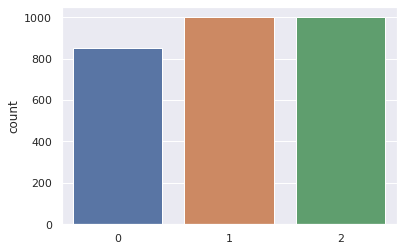

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(y)
sns.set(style ="darkgrid")
sns.countplot(y)

In [ ]:
y

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2,
       0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2,
       1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2,
       2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[ 74,  73,  72],
       [ 74, 103,  81],
       [ 64,  70, 102]])